Lab | Handling Data Imbalance in Classification Models
For this lab and in the next lessons we will use the dataset 'Healthcare For All' building a model to predict who will donate (TargetB) and how much they will give (TargetD). You will be using files_for_lab/learningSet.csv file which you have already downloaded from class.

Scenario
You are revisiting the Healthcare for All Case Study. You are provided with this historical data about Donors and how much they donated. Your task is to build a machine learning model that will help the company identify people who are more likely to donate and then try to predict the donation amount.

Instructions
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned in the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

Import the required libraries and modules that you would need.

Read that data into Python and call the dataframe donors.

Check the datatypes of all the columns in the data.

Check for null values in the dataframe. Replace the null values using the methods learned in class.

Split the data into numerical and catagorical. Decide if any columns need their dtype changed.

Split the data into a training set and a test set.
Scale the features either by using normalizer or a standard scaler.
Encode the categorical features using One-Hot Encoding or Ordinal Encoding
Fit a logistic regression model on the training data.
Check the accuracy on the test data.
Note: So far we have not balanced the data.

Managing imbalance in the dataset

Check for the imbalance.
Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
Each time fit the model and see how the accuracy of the model has changed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [2]:
numerical = pd.read_csv('numerical7_02.csv')
categorical= pd.read_csv('categorical7_02.csv')
y = pd.read_csv('target7_02.csv')

In [ ]:
numerical.shape

In [ ]:
categorical.shape

In [ ]:
y.shape 

In [3]:
numerical.isnull().sum().sort_values(ascending=False)

NEXTDATE    9973
DMA          132
ADI          132
MSA          132
ODATEDW        0
            ... 
HHD12          0
HHD11          0
HHD10          0
HHD9           0
CLUSTER2       0
Length: 322, dtype: int64

In [4]:
numerical[['ADI', 'MSA', 'DMA']].describe().T

,count,mean,std,min,25%,50%,75%,max
ADI,95280.0,187.356402,137.019184,0.0,65.0,175.0,279.0,651.0
MSA,95280.0,3527.744102,2863.904737,0.0,520.0,3350.0,5960.0,9360.0
DMA,95280.0,664.004072,116.363600,0.0,561.0,635.0,801.0,881.0


In [5]:
numerical['ADI'] = numerical['ADI'].fillna(np.mean(numerical['ADI']))

In [6]:
numerical['DMA'] = numerical['DMA'].fillna(np.mean(numerical['DMA']))

In [7]:
numerical['MSA'] = numerical['MSA'].fillna(np.mean(numerical['MSA']))

In [8]:
numerical.isnull().sum().sort_values(ascending=False)

NEXTDATE    9973
ODATEDW        0
EIC6           0
EIC14          0
EIC13          0
            ... 
ETHC1          0
HHD12          0
HHD11          0
HHD10          0
CLUSTER2       0
Length: 322, dtype: int64

In [9]:
numerical= numerical.drop(['NEXTDATE'], axis=1)

In [10]:
categorical.isnull().sum().sort_values(ascending=False)

SOLIH       89212
VETERANS    84986
STATE           0
CLUSTER         0
HOMEOWNR        0
GENDER          0
DATASRCE        0
RFA_2R          0
RFA_2A          0
GEOCODE2        0
DOMAIN_A        0
DOMAIN_B        0
dtype: int64

In [11]:
categorical= categorical.drop(['SOLIH', 'VETERANS'], axis=1)

In [12]:
categorical.isnull().sum().sort_values(ascending=False)

STATE       0
CLUSTER     0
HOMEOWNR    0
GENDER      0
DATASRCE    0
RFA_2R      0
RFA_2A      0
GEOCODE2    0
DOMAIN_A    0
DOMAIN_B    0
dtype: int64

In [ ]:
# SOLIH` | SOLICITATION LIMIT CODE IN HOUSE <br /> &nbsp; =can be mailed (Default) <br /> 00=Do Not Solicit <br /> 01=one solicitation per year <br /> 02=two solicitations per year <br /> 03=three solicitations per year <br /> 04=four solicitations per year <br /> 05=five solicitations per year <br /> 06=six solicitations 
#per year <br /> 12=twelve solicitations per year

In [13]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STATE     95412 non-null  object
 1   CLUSTER   95412 non-null  int64 
 2   HOMEOWNR  95412 non-null  object
 3   GENDER    95412 non-null  object
 4   DATASRCE  95412 non-null  int64 
 5   RFA_2R    95412 non-null  object
 6   RFA_2A    95412 non-null  object
 7   GEOCODE2  95412 non-null  object
 8   DOMAIN_A  95412 non-null  object
 9   DOMAIN_B  95412 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 7.3+ MB


In [14]:
categorical['DATASRCE'].unique()

array([3, 1, 2], dtype=int64)

In [15]:
categorical['CLUSTER'].unique()

array([36, 14, 43, 44, 16, 40, 39, 45, 35, 53, 17, 51,  2, 20, 27, 12, 22,
       13,  8, 25, 15, 42, 11, 28, 18, 24, 34,  5, 31, 32, 46,  3, 50,  7,
       37, 10, 38, 21,  9, 29, 30,  4, 41, 49, 23, 33,  1, 47, 26, 48, 19,
        6, 52], dtype=int64)

In [16]:
categorical['DOMAIN_B'].unique()

array([2, 1, 3, 4], dtype=int64)

In [17]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 321 entries, ODATEDW to CLUSTER2
dtypes: float64(14), int64(307)
memory usage: 233.7 MB


In [18]:
categorical['DATASRCE']=categorical['DATASRCE'].astype(object)
categorical['DOMAIN_B']=categorical['DOMAIN_B'].astype(object)

In [19]:
categorical.isnull().sum().sort_values(ascending=False)

STATE       0
CLUSTER     0
HOMEOWNR    0
GENDER      0
DATASRCE    0
RFA_2R      0
RFA_2A      0
GEOCODE2    0
DOMAIN_A    0
DOMAIN_B    0
dtype: int64

In [20]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STATE     95412 non-null  object
 1   CLUSTER   95412 non-null  int64 
 2   HOMEOWNR  95412 non-null  object
 3   GENDER    95412 non-null  object
 4   DATASRCE  95412 non-null  object
 5   RFA_2R    95412 non-null  object
 6   RFA_2A    95412 non-null  object
 7   GEOCODE2  95412 non-null  object
 8   DOMAIN_A  95412 non-null  object
 9   DOMAIN_B  95412 non-null  object
dtypes: int64(1), object(9)
memory usage: 7.3+ MB


In [ ]:
# numerical['CLUSTER']= categorical['CLUSTER']
# then drop cluster from categorical##categorical= categorical.drop(['CLUSTER'], axis=1)

In [21]:
# Build X and y
y = y['TARGET_B']
X = pd.concat([categorical, numerical], axis=1)

In [22]:
# split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
y_train.isnull().sum() 

0

In [24]:
# X_train_df = pd.DataFrame(X_train, columns=X.columns)
# X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(object)
X_test_cat  = X_test.select_dtypes(object)

In [26]:
X_train_num.describe().T

,count,mean,std,min,25%,50%,75%,max
CLUSTER,76329.0,28.201981,14.391613,1.000000,16.000000,29.000000,40.000000,53.0
ODATEDW,76329.0,9141.268129,343.730182,8306.000000,8801.000000,9201.000000,9501.000000,9701.0
TCODE,76329.0,53.920214,959.400501,0.000000,0.000000,1.000000,2.000000,72002.0
DOB,76329.0,2721.541983,2132.791344,0.000000,201.000000,2608.000000,4601.000000,9710.0
AGE,76329.0,61.618528,14.457606,1.000000,52.000000,61.611649,72.000000,98.0
...,...,...,...,...,...,...,...,...
AVGGIFT,76329.0,13.331892,10.809786,1.285714,8.390244,11.625000,15.454545,1000.0
CONTROLN,76329.0,95939.952286,55240.865304,1.000000,48235.000000,95945.000000,143691.000000,191779.0
HPHONE_D,76329.0,0.500662,0.500003,0.000000,0.000000,1.000000,1.000000,1.0
RFA_2F,76329.0,1.911685,1.073080,1.000000,1.000000,2.000000,3.000000,4.0


In [27]:
# scale numericals
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler

# Normalizing data
transformer = MinMaxScaler().fit(X_train_num) # we will reuse this transformer for X_test later
X_train_scaled_arr = transformer.transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train_num.columns)
X_train_scaled.head()

,CLUSTER,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0.019231,0.928315,0.000389,0.000000,0.624862,0.666667,0.666667,0.000000,0.0,0.292929,0.363636,0.212121,0.070707,0.010101,0.033333,0.555556,0.007568,0.008710,0.008926,1.0,0.000000,0.000000,0.464646,0.545455,0.888889,0.020202,0.010101,0.060606,0.080808,0.0,0.027778,0.0,0.029851,0.043478,0.0,0.0,0.020619,0.02,0.024691,0.034884,0.457831,0.542169,0.578313,0.506173,0.604938,0.629630,0.253333,0.525253,0.373737,0.111111,0.061856,0.212121,0.212121,0.111111,0.171717,0.111111,0.144444,0.202020,0.212121,0.363636,0.151515,0.080808,0.333333,0.141414,0.313131,0.303030,0.343434,0.373737,0.202020,0.060606,0.030303,0.555556,0.090909,0.149254,0.262626,0.246154,0.337143,0.313131,0.272727,0.232323,0.686869,0.454545,0.313131,0.000000,0.000000,0.000000,0.215667,0.226000,0.384615,0.384615,0.535354,0.474747,0.959596,0.050505,0.000000,0.242424,0.666667,0.535354,0.212121,0.838384,0.171717,0.030303,0.02,0.030303,0.141414,0.303030,0.050505,0.200000,0.484848,0.252525,0.000000,0.020202,0.0,0.080808,0.363636,0.757576,0.919192,1.000000,0.020202,0.040404,0.464646,0.623529,0.600000,0.213115,0.100,0.474747,0.212121,0.000000,0.010101,0.232323,0.242424,0.000000,0.595960,0.838384,0.969697,1.000000,0.170940,0.078341,0.683314,0.214000,0.266667,0.234667,0.291333,0.089392,0.303030,0.101010,0.121212,0.171717,0.212121,0.070707,0.06,0.0,0.0,0.171717,0.070707,0.111111,0.232323,0.282828,0.101010,0.08,0.0,0.0,0.272727,0.060606,0.454545,0.202020,0.464646,0.545455,0.020202,0.737374,0.050505,0.151515,0.050505,0.181818,0.0,0.0,0.020202,0.050505,0.020202,0.010101,0.311111,0.460526,0.131313,0.787879,0.666667,0.747475,0.595960,0.545455,0.575758,0.898990,0.848485,1.000000,0.000000,0.060606,0.131313,0.181818,0.030303,0.191919,0.242424,0.000000,0.036364,0.111111,0.000000,0.060606,0.030303,0.000000,0.000000,0.000000,0.000000,0.040404,0.141414,0.000000,0.000000,0.050505,0.151515,0.151515,0.030303,0.030303,0.049180,0.040404,0.191919,0.151515,0.000000,0.090909,0.000000,0.000000,0.080808,0.727273,0.101010,0.000000,0.735294,0.070707,0.171717,0.242424,0.212121,0.135135,0.161616,0.101010,0.092784,0.070707,0.033333,0.125000,0.060606,0.0,0.0,0.0,0.141414,0.313131,0.000000,0.060606,0.313131,0.383838,0.131313,0.000000,0.000000,0.000000,0.173

In [28]:
# encode categoricals
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_cat = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
 
onehot_encoded = pd.DataFrame(encoded_cat, columns=cols)
onehot_encoded.head()

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_C,GENDER_F,GENDER_J,GENDER_M,GENDER_U,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
X_test_scaled_arr = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)
X_test_scaled.head()

,CLUSTER,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0.211538,0.928315,0.000014,0.597425,0.402062,0.833333,1.000000,0.045643,0.000000,0.282828,0.333333,0.191919,0.030303,0.141414,0.050000,0.555556,0.012594,0.014895,0.012767,0.929293,0.0,0.080808,0.515152,0.494949,0.979798,0.000000,0.010101,0.020202,0.040404,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.020619,0.00,0.000000,0.023256,0.421687,0.493976,0.506024,0.419753,0.530864,0.555556,0.373333,0.313131,0.434343,0.262626,0.103093,0.191919,0.323232,0.191919,0.111111,0.060606,0.033333,0.151515,0.101010,0.353535,0.242424,0.161616,0.131313,0.030303,0.121212,0.141414,0.373737,0.494949,0.272727,0.101010,0.020202,0.646465,0.121212,0.044776,0.212121,0.301538,0.391429,0.898990,0.858586,0.020202,0.101010,0.070707,0.060606,0.0,0.0,0.0,0.167833,0.187500,0.307692,0.307692,0.858586,0.151515,0.979798,0.030303,0.141414,0.414141,0.787879,0.666667,0.333333,0.878788,0.131313,0.080808,0.04,0.060606,0.131313,0.121212,0.070707,0.293333,0.656566,0.101010,0.000000,0.000000,0.000000,0.050505,0.161616,0.515152,0.848485,0.979798,0.000000,0.010101,0.828283,0.870588,0.800000,0.245902,0.100,0.090909,0.010101,0.0,0.060606,0.030303,0.060606,0.0,0.242424,0.313131,0.858586,0.949495,0.115385,0.683564,0.859251,0.282000,0.324000,0.354667,0.386667,0.107533,0.060606,0.121212,0.171717,0.222222,0.242424,0.070707,0.14,0.065574,0.010101,0.050505,0.080808,0.161616,0.252525,0.232323,0.090909,0.14,0.060606,0.010101,0.151515,0.020202,0.686869,0.060606,0.555556,0.454545,0.111111,0.838384,0.111111,0.000000,0.000000,0.0,0.0,0.00,0.020202,0.040404,0.0,0.010101,0.166667,0.210526,0.000000,0.535354,0.808081,0.858586,0.757576,0.858586,0.696970,0.777778,0.626263,1.000000,1.0,0.000000,0.191919,0.222222,0.040404,0.111111,0.181818,0.000000,0.018182,0.080808,0.020202,0.080808,0.030303,0.040404,0.000000,0.020202,0.015385,0.101010,0.111111,0.030303,0.078125,0.040404,0.111111,0.101010,0.050505,0.030303,0.016393,0.050505,0.101010,0.090909,0.090909,0.030303,0.141414,0.030303,0.141414,0.575758,0.090909,0.000000,0.905882,0.030303,0.010101,0.151515,0.292929,0.162162,0.343434,0.121212,0.051546,0.303030,0.066667,0.277778,0.141414,0.0,0.000000,0.0,0.161616,0.282828,0.066667,0.333333,0.222222,0.191919,0.121212,0.0,0.090909,0.033333,0.08

In [30]:
# apply encoded to X_test_cat
encoded_test_cat = encoder.transform(X_test_cat).toarray()
onehot_encoded_test = pd.DataFrame(encoded_test_cat, columns=cols)
onehot_encoded_test.head()

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_C,GENDER_F,GENDER_J,GENDER_M,GENDER_U,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
X_train_treated = pd.concat([X_train_scaled, onehot_encoded], axis=1)

In [32]:
X_test_treated = pd.concat([X_test_scaled, onehot_encoded_test], axis=1)

In [33]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='newton-cg',
                  multi_class='ovr')
classification.fit(X_train_treated, y_train)

LogisticRegression(multi_class='ovr', random_state=0, solver='newton-cg')

In [34]:
predictions = classification.predict(X_test_treated)
predictions
classification.score(X_test_treated, y_test)

0.9487501965099827

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[18105,     0],
       [  978,     0]], dtype=int64)

In [41]:
y_train.value_counts()

0    72464
1     3865
Name: TARGET_B, dtype: int64

In [ ]:
18105/(18105+978) # score for blindly guessing 0 always

<AxesSubplot:>

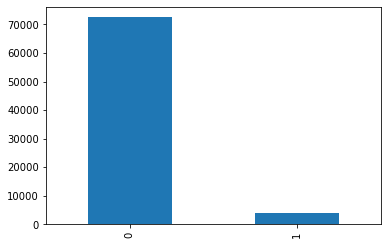

In [39]:
# while there are more imbalanced datasets, we have a significant imbalance
# and the cost of failing to detect the minority class is quite high (lack of diagnosis of diabetes)
count_classes = y_train.value_counts()
count_classes
count_classes.plot(kind = 'bar')

In [38]:
#while accuracy is not absolutely terrible, a closer look reveals some serious problems
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("precision: ",precision_score(y_test,predictions))
print("recall: ",recall_score(y_test,predictions))
print("f1: ",f1_score(y_test,predictions))
  

precision:  0.0
recall:  0.0
f1:  0.0


C:\IronHack\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
y_train=y_train.reset_index(drop=True)

In [44]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
76324    0
76325    0
76326    0
76327    0
76328    0
Name: TARGET_B, Length: 76329, dtype: int64

In [46]:
train = pd.concat([X_train_treated, y_train], axis=1, ignore_index=False)
 

In [47]:
train.shape

(76329, 355)

## Oversampling

In [48]:
no_donation = train[train['TARGET_B']==0]
yes_donation = train[train['TARGET_B']==1]

In [49]:
display(no_donation.shape)
display(yes_donation.shape)

(72464, 355)

(3865, 355)

In [50]:
# oversample minority
from sklearn.utils import resample
yes_donation_oversampled = resample(yes_donation, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(no_donation),#<- make both sets the same size
                                    random_state=0)

In [51]:
display(no_donation.shape)
display(yes_donation_oversampled.shape)

(72464, 355)

(72464, 355)

In [52]:
train_oversampled = pd.concat([no_donation,yes_donation_oversampled],axis=0)
train_oversampled.tail()

,CLUSTER,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_C,GENDER_F,GENDER_J,GENDER_M,GENDER_U,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,TARGET_B
45012,0.480769,0.569892,0.000000,0.144799,0.855670,0.166667,0.333333,0.037344,0.0,0.353535,0.181818,0.636364,0.090909,0.030303,0.033333,0.333333,0.015511,0.017841,0.018049,1.0,0.000000,0.000000,0.454545,0.555556,0.797980,0.030303,0.020202,0.040404,0.252525,0.000000,0.013889,0.000000,0.029851,0.000000,0.000000,0.0,0.237113,0.0,0.0,0.034884,0.361446,0.481928,0.542169,0.432099,0.555556,0.617284,0.360000,0.595960,0.313131,0.101010,0.154639,0.262626,0.161616,0.101010,0.080808,0.141414,0.122222,0.252525,0.212121,0.323232,0.141414,0.080808,0.323232,0.131313,0.303030,0.262626,0.373737,0.373737,0.191919,0.060606,0.020202,0.515152,0.171717,0.134328,0.242424,0.252308,0.340000,0.585859,0.505051,0.020202,0.414141,0.393939,0.363636,0.000000,0.000000,0.0,0.244500,0.245167,0.384615,0.384615,0.474747,0.535354,0.939394,0.070707,0.111111,0.333333,0.666667,0.444444,0.181818,0.797980,0.212121,0.151515,0.04,0.131313,0.141414,0.262626,0.080808,0.213333,0.424242,0.202020,0.018182,0.020202,0.0,0.070707,0.474747,0.888889,1.000000,1.000000,0.000000,0.080808,0.292929,0.541176,0.511111,0.213115,0.125,0.161616,0.252525,0.000000,0.161616,0.050505,0.323232,0.0,0.565657,0.838384,0.878788,0.909091,0.799145,0.026114,0.970488,0.207333,0.215333,0.237333,0.261333,0.086567,0.212121,0.181818,0.191919,0.212121,0.151515,0.040404,0.00,0.000000,0.020202,0.202020,0.151515,0.191919,0.171717,0.202020,0.060606,0.00,0.000000,0.030303,0.303030,0.171717,0.505051,0.131313,0.575758,0.434343,0.080808,0.818182,0.090909,0.000000,0.000000,0.0,0.0,0.08,0.070707,0.020202,0.000000,0.101010,0.155556,0.250000,0.040404,0.464646,0.505051,0.646465,0.373737,0.636364,0.363636,0.484848,0.505051,0.050505,0.000000,0.343434,0.101010,0.131313,0.050505,0.131313,0.121212,0.023256,0.018182,0.090909,0.040404,0.101010,0.080808,0.080808,0.060606,0.060606,0.030769,0.030303,0.151515,0.050505,0.046875,0.101010,0.171717,0.101010,0.050

In [53]:
y_train_over = train_oversampled['TARGET_B'].copy()
X_train_over = train_oversampled.drop('TARGET_B',axis = 1).copy()

In [54]:
X_train_scaled.shape

(76329, 322)

In [55]:
from sklearn.linear_model import LogisticRegression
LR_over = LogisticRegression(random_state=0, solver='newton-cg')
LR_over.fit(X_train_over, y_train_over)
pred = LR_over.predict(X_test_treated)
 


In [56]:
print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))


precision:  0.07032085561497327
recall:  0.5378323108384458
f1:  0.12437928588318753


In [64]:
confusion_matrix(y_test,pred)

array([[11151,  6954],
       [  452,   526]], dtype=int64)

In [57]:
# undersample majority
no_donation_undersampled = resample(no_donation, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(yes_donation),
                                    random_state=0)

In [58]:
# both sets are the same size
# small, but balanced, and no repeated data
display(yes_donation.shape)
display(no_donation_undersampled.shape)

(3865, 355)

(3865, 355)

In [59]:
train_undersampled = pd.concat([yes_donation,no_donation_undersampled], axis=0)
train_undersampled.tail()

,CLUSTER,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_C,GENDER_F,GENDER_J,GENDER_M,GENDER_U,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,TARGET_B
8753,0.384615,0.211470,0.000028,0.083625,0.907216,0.666667,0.666667,0.000000,0.000000,0.242424,0.161616,0.393939,0.050505,0.010101,0.016667,0.444444,0.026565,0.023100,0.022540,1.0,0.000000,0.000000,0.494949,0.515152,0.696970,0.020202,0.010101,0.070707,0.515152,0.045455,0.000000,0.000000,0.044776,0.021739,0.021277,0.0,0.463918,0.02,0.012346,0.058140,0.361446,0.469880,0.530120,0.419753,0.530864,0.592593,0.360000,0.363636,0.393939,0.262626,0.185567,0.222222,0.191919,0.131313,0.121212,0.111111,0.055556,0.151515,0.131313,0.303030,0.232323,0.191919,0.303030,0.141414,0.262626,0.272727,0.242424,0.484848,0.353535,0.242424,0.161616,0.515152,0.111111,0.119403,0.303030,0.298462,0.437143,0.555556,0.535354,0.000000,0.262626,0.262626,0.262626,0.010101,0.0,0.010101,0.266833,0.262667,0.384615,0.384615,0.666667,0.343434,0.969697,0.040404,0.030303,0.383838,0.696970,0.555556,0.292929,0.838384,0.171717,0.090909,0.06,0.060606,0.161616,0.212121,0.040404,0.186667,0.414141,0.141414,0.0,0.010101,0.0,0.050505,0.676768,0.959596,0.989899,1.000000,0.000000,0.111111,0.454545,0.611765,0.533333,0.245902,0.150,0.000000,0.262626,0.181818,0.090909,0.000000,0.252525,0.0,0.494949,0.636364,0.727273,0.787879,0.478632,0.019969,0.911464,0.214000,0.258000,0.250667,0.298000,0.067934,0.232323,0.161616,0.131313,0.161616,0.242424,0.060606,0.02,0.016393,0.000000,0.090909,0.151515,0.141414,0.232323,0.272727,0.080808,0.02,0.020202,0.000000,0.343434,0.101010,0.333333,0.131313,0.474747,0.535354,0.060606,0.797980,0.181818,0.010101,0.010101,0.000000,0.0,0.0,0.020202,0.010101,0.000000,0.262626,0.288889,0.407895,0.090909,0.717172,0.656566,0.797980,0.525253,0.757576,0.474747,0.555556,0.303030,0.686869,0.686869,0.131313,0.040404,0.070707,0.010101,0.111111,0.212121,0.023256,0.036364,0.101010,0.030303,0.121212,0.161616,0.040404,0.070707,0.030303,0.015385,0.050505,0.282828,0.060606,0.031250,0.080808,0.212121,0.040

In [61]:
y_train_under = train_undersampled['TARGET_B'].copy()
X_train_under = train_undersampled.drop('TARGET_B',axis = 1).copy()

In [62]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='newton-cg')
LR.fit(X_train_under, y_train_under)
pred1 = LR.predict(X_test_treated)

print("precision: ",precision_score(y_test,pred1))
print("recall: ",recall_score(y_test,pred1))
print("f1: ",f1_score(y_test,pred1))

precision:  0.06872809213820731
recall:  0.5613496932515337
f1:  0.12246263662725855


In [63]:
confusion_matrix(y_test,pred1)

array([[10666,  7439],
       [  429,   549]], dtype=int64)